<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Spatstat-playground" data-toc-modified-id="Spatstat-playground-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Spatstat playground</a></span><ul class="toc-item"><li><span><a href="#DPPs-with-stationnary-isotropic-kernels" data-toc-modified-id="DPPs-with-stationnary-isotropic-kernels-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>DPPs with stationnary isotropic kernels</a></span><ul class="toc-item"><li><span><a href="#Gaussian-kernel" data-toc-modified-id="Gaussian-kernel-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Gaussian kernel</a></span><ul class="toc-item"><li><span><a href="#Pair-correlation-function" data-toc-modified-id="Pair-correlation-function-1.1.1.1"><span class="toc-item-num">1.1.1.1&nbsp;&nbsp;</span>Pair correlation function</a></span></li><li><span><a href="#Simulation" data-toc-modified-id="Simulation-1.1.1.2"><span class="toc-item-num">1.1.1.2&nbsp;&nbsp;</span>Simulation</a></span></li><li><span><a href="#Estimation" data-toc-modified-id="Estimation-1.1.1.3"><span class="toc-item-num">1.1.1.3&nbsp;&nbsp;</span>Estimation</a></span></li><li><span><a href="#Kernel-parameter-estimation-for-a-sample" data-toc-modified-id="Kernel-parameter-estimation-for-a-sample-1.1.1.4"><span class="toc-item-num">1.1.1.4&nbsp;&nbsp;</span>Kernel parameter estimation for a sample</a></span></li></ul></li></ul></li></ul></li></ul></div>

# Spatstat playground

**First session Friday 06/18/2021** https://github.com/For-a-few-DPPs-more/spatstat-interface

Let's take Determinantal Point Processes (DPPs) as a running example to play with the [`spatstat`](https://spatstat.org/) (Spatial Statistics) R package from Python!
More specifically, we'll perform both sampling and inference on DPPs using `spatstat`.

To do this, one can use the Python package [`rpy2`](https://rpy2.github.io/doc/v3.4.x/html/overview.html#installation) to ensure the interoperability with [`R`](https://www.r-project.org/).
In other words, `rpy2` allows us to call `R` from `Python`.

`spatstat` has been split into multiple subpackages and extensions, see [`spatstat` GitHub repo](https://github.com/spatstat/spatstat).
In this notebook will make use of
- [spatstat.core](https://www.rdocumentation.org/packages/spatstat.core/versions/2.2-0)
- [spatstat.geom](https://www.rdocumentation.org/packages/spatstat.core/versions/2.2-0)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
import pandas as pd

import rpy2.robjects as robjects
# Activate automatic conversion of numpy floats and arrays to corresponding R objects
from rpy2.robjects import numpy2ri
numpy2ri.activate() #numpy2ri.deactivate()

In order to interact with the source code stored in the `'../src/'` directory and make the latest version avalaible in the notebook, please run the following cell.

In [2]:
%load_ext autoreload
%autoreload 2
import os
import sys
sys.path.insert(0, os.path.abspath('../src/'))

In [3]:
from spatstat_interface.utils import convert_r_df_to_pandas_df
from spatstat_interface.interface import SpatstatInterface

spatstat = SpatstatInterface(update=True)
spatstat.import_package("core", "geom", update=False)

R[write to console]: trying URL 'https://cloud.r-project.org/bin/macosx/contrib/4.1/spatstat_2.1-0.tgz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 3582252 bytes (3.4 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wri


The downloaded binary packages are in
	/var/folders/y7/jwxfdr9j79sck85dryxmpd3c0000gn/T//RtmpqeDrS4/downloaded_packages


## DPPs with stationnary isotropic kernels

### Gaussian kernel

$K(x, y) = \rho \exp(−\|\frac{x - y}{\alpha}\|^2)$

$\rho_{\max} = \left(\sqrt{\pi} \alpha\right)^{-d}$

In [4]:
rho = 100
alpha = 0.05
d = 2
rho_max = (np.sqrt(np.pi) * alpha)**(-d)
assert rho <= rho_max

# spatstat.core.dppGauss(lambda=, alpha=, d=)
# However lambda is a reserved Python keyword
# Let's circumvent the problem using a dictionnary
params = {"lambda": rho, "alpha": alpha, "d": d}
my_dpp = spatstat.core.dppGauss(**params)
my_dpp

<rpy2.robjects.vectors.ListVector object at 0x7fdd62552cc0> [RTYPES.VECSXP]
R classes: ('detpointprocfamily',)
[ListSexpV..., StrSexpVe..., SexpClosure, SexpClosure, ..., SexpClosure, BoolSexpV..., SexpClosure, StrSexpVe...]
<rpy2.robjects.vectors.ListVector object at 0x7fdd62552cc0> [RTYPES.VECSXP]
R classes: ('detpointprocfamily',)
[ListSexpV..., StrSexpVe..., SexpClosure, SexpClosure, ..., SexpClosure, BoolSexpV..., SexpClosure, StrSexpVe...]
  freepar: <class 'rpy2.robjects.vectors.StrVector'>
  <rpy2.robjects.vectors.StrVector object at 0x7fdd62caa200> [RTYPES.STRSXP]
R classes: ('character',)
[]
  kernel: <class 'rpy2.robjects.functions.SignatureTranslatedFunction'>
  <rpy2.robjects.functions.SignatureTranslatedFunction object at 0x7fdd509b2700> [RTYPES.CLOSXP]
R classes: ('function',)
  specden: <class 'rpy2.robjects.functions.SignatureTranslatedFunction'>
  <rpy2.robjects.functions.SignatureTranslatedFunction object at 0x7fdd61c78a40> [RTYPES.CLOSXP]
R classes: ('function',)
...
  intensity: <class 'rpy2.robjects.functions.SignatureTranslatedFunction'>
  <rpy2.robjects.functions.SignatureTranslatedFunction object at 0x7fdd509676c0> [RTYPES.CLOSXP]
R classes: ('function',)
  thin: <class 'rpy2.robjects.vectors.BoolVector'>
  <rpy2.robjects.vectors.BoolVector object at 0x7fdd50939ec0> [RTYPES.LGLSXP]
R classes: ('logical',)
[       1]
  dim: <class 'rpy2.robjects.functions.SignatureTranslatedFunction'>
  <rpy2.robjects.functions.SignatureTranslatedFunction object at 0x7fdd50967980> [RTYPES.CLOSXP]
R classes: ('detpointprocfamilyfun', 'pointprocfamilyfun', 'function')
  name: <class 'rpy2.robjects.vectors.StrVector'>
  <rpy2.robjects.vectors.StrVector object at 0x7fdd5093e600> [RTYPES.STRSXP]
R classes: ('character',)
['fourierbasis']

#### Pair correlation function

##### Theoretical pcf

In [5]:
pcf = spatstat.core.pcfmodel(my_dpp)

(0.0, 0.15)

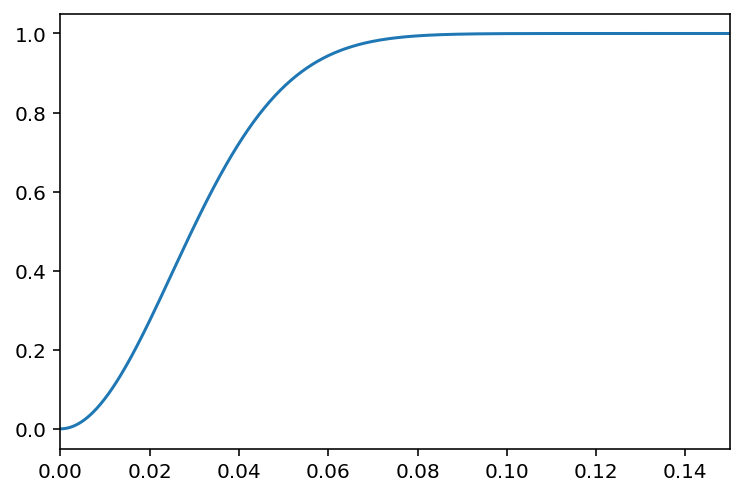

In [6]:
numpy2ri.activate()  # to call pcf on a numpy array
fig, ax = plt.subplots()
r = np.linspace(0, 0.3, 1000)
ax.plot(r, pcf(r))
ax.set_xlim(0, 0.15)

#### Simulation

Define the window where the points will be sampled from

In [7]:
# using spatstat.geom.boxx
numpy2ri.activate()
bound = np.array([0, 2])
window = spatstat.geom.boxx(bound, bound)

# using spatstat.geom.owin
bound = robjects.FloatVector([0, 2])
window = spatstat.geom.owin(xrange=bound, yrange=bound)

Generate the sample using `spatstat.core.simulate_dppm`

In [8]:
rsample = spatstat.core.simulate_dppm(my_dpp, W=window)
rsample

window,[RTYPES.VECSXP]
n,[RTYPES.INTSXP]
x,[RTYPES.REALSXP]
y,[RTYPES.REALSXP]
markformat,[RTYPES.STRSXP]


Convert spatstat sample to a numpy.array (as if the sample was generated or imported using Python)

In [9]:
sample = np.array([rsample.rx2("x"), rsample.rx2("y")])
sample.shape

(2, 405)

Display the sample

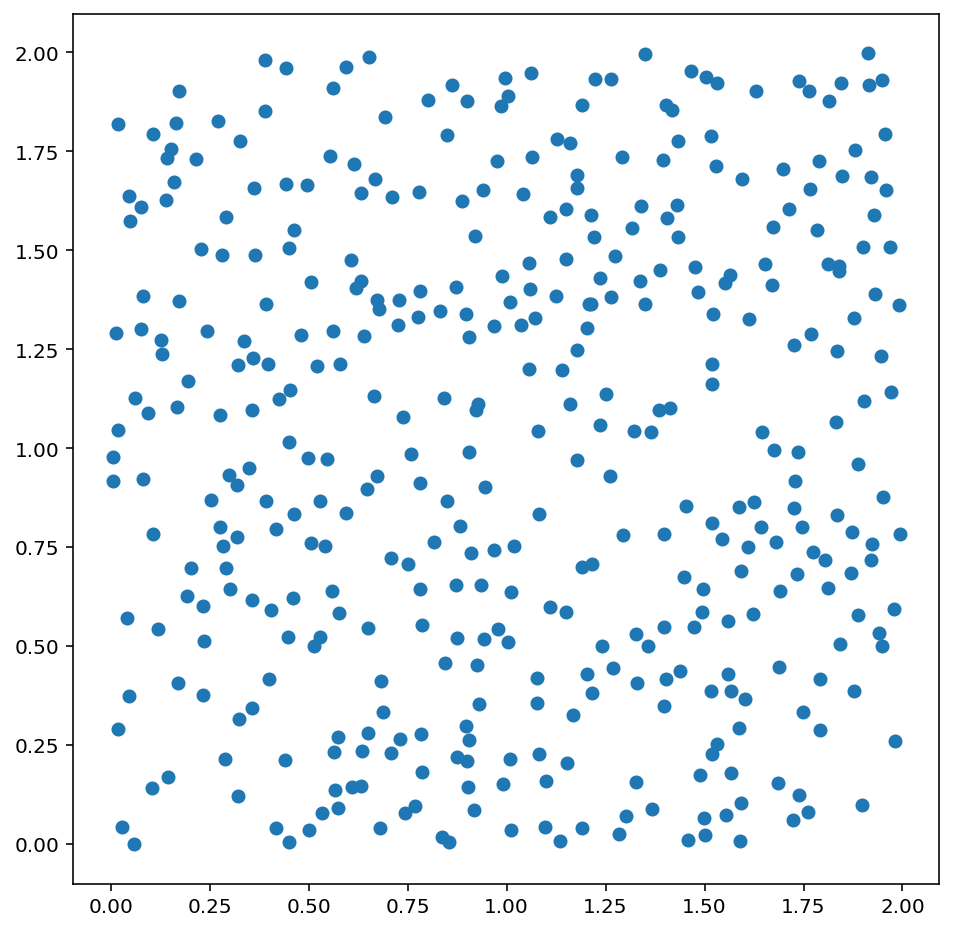

In [10]:
fig, ax = plt.subplots(figsize=(8, 8))
r = np.linspace(0, 0.3, 1000)
ax.scatter(*sample) # equivalent to scatter(sample[0], sample[1])
ax.set_aspect('equal', 'box')

#### Estimation

From a sample generated by spatstat

In [11]:
# If numpy2ri.activate() the output of spatstat.core.pcf is automatically converted to a numpy array 
# Otherwise it is an R DataFrame that we can convert to a pandas DataFrame
numpy2ri.deactivate()
pcf_r = spatstat.core.pcf_ppp(rsample)
pcf_df = convert_r_df_to_pandas_df(pcf_r)
pcf_df

,r,theo,trans,iso
1,0.000000,1.0,inf,inf
2,0.000977,1.0,0.489096,0.487056
3,0.001953,1.0,0.297704,0.296253
4,0.002930,1.0,0.230381,0.229150
5,0.003906,1.0,0.194160,0.193057
...,...,...,...,...
509,0.496094,1.0,0.960549,0.965176
510,0.497070,1.0,0.957117,0.961266
511,0.498047,1.0,0.954180,0.957846
512,0.499023,1.0,0.951725,0.954676


(0.0, 0.15)

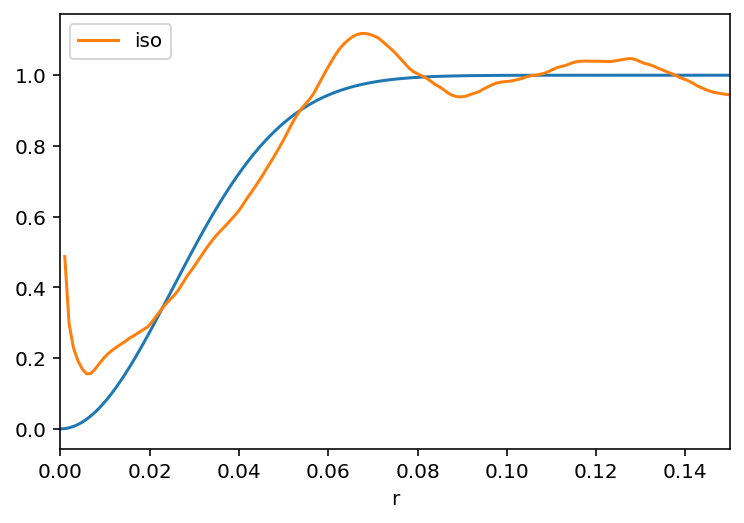

In [12]:
fig, ax = plt.subplots()
r = np.linspace(0, 0.3, 1000)
numpy2ri.activate()
ax.plot(r, pcf(r))
pcf_df.plot("r", "iso", ax=ax)
ax.set_xlim(0, 0.15)

From a sample stored in a numpy array

In [13]:
numpy2ri.activate()
# Each row of `sample` is associated to a coordinate
X = spatstat.geom.ppp(*sample, window=window)
numpy2ri.deactivate()
pcf_r = spatstat.core.pcf_ppp(X)
pcf_df = convert_r_df_to_pandas_df(pcf_r)
pcf_df

,r,theo,trans,iso
1,0.000000,1.0,inf,inf
2,0.000977,1.0,0.489096,0.487056
3,0.001953,1.0,0.297704,0.296253
4,0.002930,1.0,0.230381,0.229150
5,0.003906,1.0,0.194160,0.193057
...,...,...,...,...
509,0.496094,1.0,0.960549,0.965176
510,0.497070,1.0,0.957117,0.961266
511,0.498047,1.0,0.954180,0.957846
512,0.499023,1.0,0.951725,0.954676


(0.0, 0.15)

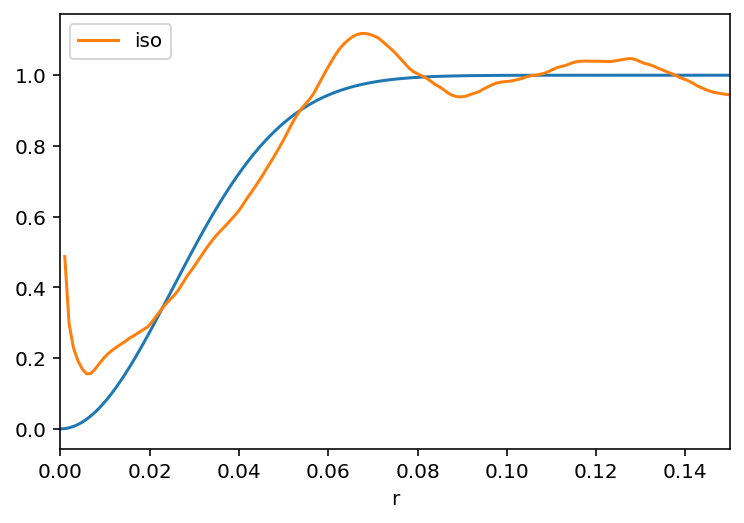

In [14]:
fig, ax = plt.subplots()
r = np.linspace(0, 0.3, 1000)
numpy2ri.activate()
ax.plot(r, pcf(r))
pcf_df.plot("r", "iso", ax=ax)
ax.set_xlim(0, 0.15)

#### Kernel parameter estimation for a sample

In [15]:
def convert_to_dict(x):
    return dict(zip(x.names, x))

Recall the parameters of the original DPP

In [16]:
params = convert_to_dict(my_dpp.rx2("fixedpar"))
params

{'lambda': array([100], dtype=int32),
 'alpha': array([0.05]),
 'd': array([2], dtype=int32)}

Fit a DPP from a sample

In [17]:
dpp_family = spatstat.core.dppGauss
formula = robjects.Formula("X ~ 1")
formula.environment["X"] = rsample

my_dpp_fitted = spatstat.core.dppm(formula=formula, family=dpp_family).rx2("fitted")
fitted_params = convert_to_dict(my_dpp_fitted.rx2("fixedpar"))
fitted_params

{'alpha': array([0.04944655]), 'lambda': array([101.25]), 'd': array([2.])}

In [18]:
pcf_fitted_dpp = spatstat.core.pcfmodel(my_dpp_fitted)

Let's have a look at the correlation function.

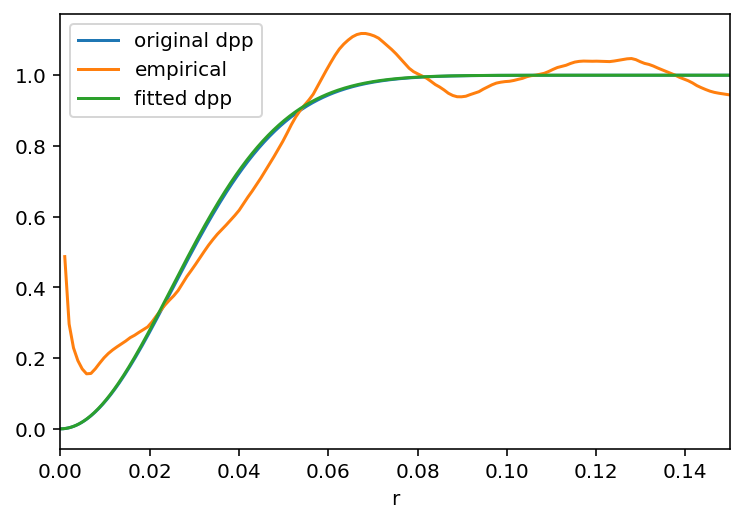

In [19]:
fig, ax = plt.subplots()

r = np.linspace(0, 0.3, 1000)
numpy2ri.activate()
ax.plot(r, pcf(r), label="original dpp")
pcf_df.plot("r", "iso", ax=ax, label="empirical")
ax.plot(r, pcf_fitted_dpp(r), label="fitted dpp")

ax.set_xlim(0, 0.15)
plt.legend()